# 0. Imports

# 1. Exemplo 1: Com dados sintéticos

In [67]:
from sklearn.datasets import make_classification


X, y = make_classification(
    n_features=6,
    n_classes=2,
    n_samples=2000,
    n_informative=2,
    random_state=123,
    n_clusters_per_class=1
)

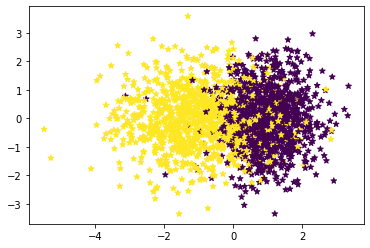

In [68]:
# Visualizando os pontos criados 
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, marker="*");

## Divisão em treino, teste e validação

In [69]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [70]:
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=123)

In [71]:
print('Tamanho do conjunto de treino: {}'.format(X_train.shape[0]))
print('Tamanho do conjunto de teste: {}'.format(X_test.shape[0]))
print('Tamanho do conjunto de validação: {}'.format(X_val.shape[0]))

Tamanho do conjunto de treino: 1600
Tamanho do conjunto de teste: 200
Tamanho do conjunto de validação: 200


## Construção do modelo

In [72]:
from sklearn.naive_bayes import GaussianNB

In [73]:
# Build a Gaussian Classifier
model = GaussianNB()

# Treinando o modelo
model.fit(X_train, y_train)

GaussianNB()

## Avaliação do modelo

In [74]:
from sklearn.metrics import (
    accuracy_score,
    recall_score, 
    precision_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    classification_report
)

In [75]:
# Métricas no conjunto de validação
y_pred_val = model.predict(X_val)
acc_val = accuracy_score(y_val, y_pred_val)
rec_val = recall_score(y_val, y_pred_val)
prec_val = precision_score(y_val, y_pred_val)

print('Acurácia no conjunto de validação: {}'.format(acc_val))
print('Recall no conjunto de validação: {}'.format(rec_val))
print('Precisão no conjunto de validação: {}'.format(prec_val))

Acurácia no conjunto de validação: 0.94
Recall no conjunto de validação: 0.8709677419354839
Precisão no conjunto de validação: 1.0


In [76]:
# se quisermos ver a matriz de confusão
cm = confusion_matrix(y_val, y_pred_val)
print(cm)

[[107   0]
 [ 12  81]]


Text(0, 0.5, 'Rótulos Verdadeiros')

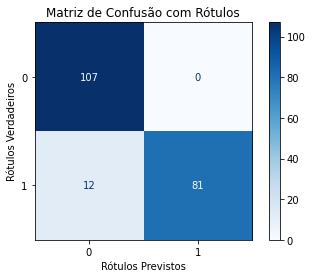

In [77]:
# Opcional: Plotar a matriz de confusão com rótulos
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['0', '1'])
disp.plot(cmap='Blues')
disp.ax_.set_title('Matriz de Confusão com Rótulos')
disp.ax_.set_xlabel('Rótulos Previstos')
disp.ax_.set_ylabel('Rótulos Verdadeiros')

**↪️ Interpretação**

- Uma acurácia de 0.94 significa que 94% das previsões feitas pelo modelo estavam corretas. Em outras palavras, o modelo acertou 94 em cada 100 amostras.
-  Um recall de 1.0 significa que o modelo identificou corretamente todos os casos positivos presentes no conjunto de validação. Em outras palavras, não houve falsos negativos, ou seja, o modelo não deixou de identificar nenhum caso positivo.
- Uma precisão de aproximadamente 0.87 significa que, entre todas as amostras que o modelo previu como positivas, 87% estavam corretas. Em outras palavras, 13% das previsões positivas do modelo foram falsos positivos (casos que o modelo previu como positivos, mas que na verdade não eram).

**↪️ Contextualização dos Resultados**

> 💡 Alta Acurácia (0.94): O modelo está geralmente correto na maioria das suas previsões.

> 💡 Recall Perfeito (1.0): O modelo não perdeu nenhum caso positivo, o que é muito importante em contextos onde identificar todos os positivos é crucial, como em diagnósticos médicos para doenças graves.

> 💡 Boa Precisão (0.87): A maioria das previsões positivas do modelo são corretas, mas há alguns falsos positivos. Dependendo do contexto, falsos positivos podem ser aceitáveis ou problemáticos. Por exemplo, em um teste médico, falsos positivos podem levar a exames adicionais desnecessários, mas são menos críticos do que falsos negativos.

In [78]:
# Métricas no conjunto de teste
y_pred_test = model.predict(X_test)
acc_test = accuracy_score(y_pred_test, y_test)
rec_test = recall_score(y_pred_test, y_test)
prec_test = precision_score(y_pred_test, y_test)

print('Acurácia no conjunto de teste: {}'.format(acc_test))
print('Recall no conjunto de teste: {}'.format(rec_test))
print('Precisão no conjunto de teste: {}'.format(prec_test))

Acurácia no conjunto de teste: 0.97
Recall no conjunto de teste: 1.0
Precisão no conjunto de teste: 0.9381443298969072


In [79]:
report = classification_report(y_pred_test, y_test)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.94      0.97       109
           1       0.94      1.00      0.97        91

    accuracy                           0.97       200
   macro avg       0.97      0.97      0.97       200
weighted avg       0.97      0.97      0.97       200



> 💡 A acurácia é ligeiramente maior no conjunto de teste (97%) em comparação com o conjunto de validação (94%). Isso significa que o modelo está acertando um pouco mais no conjunto de teste. A diferença não é muito grande, indicando que o modelo tem um bom desempenho consistente, mas pode haver uma leve variação devido a diferentes subconjuntos de dados usados na validação e no teste.

> 💡 O recall é perfeito (1.0) em ambos os conjuntos. Isso significa que, em ambos os casos, o modelo identificou todos os casos positivos corretamente, sem deixar nenhum verdadeiro positivo de fora. Esta é uma característica muito positiva, especialmente em contextos críticos onde perder um caso positivo pode ser muito prejudicial.

> 💡 A precisão é um pouco maior no conjunto de teste (aproximadamente 93.8%) em comparação com o conjunto de validação (aproximadamente 87.1%). Isso indica que, no conjunto de teste, a maioria das previsões positivas são corretas, com menos falsos positivos em comparação com o conjunto de validação. Uma maior precisão no conjunto de teste sugere que o modelo é mais assertivo em suas previsões positivas nesse conjunto.


> 💡 Consistência entre conjuntos: As métricas são relativamente consistentes entre os conjuntos de teste e validação, sugerindo que o modelo tem um desempenho estável e generaliza bem para dados não vistos.

> 💡 No geral, o modelo parece robusto e capaz de generalizar bem para novos dados, com desempenho consistente e alta capacidade de identificar corretamente os casos positivos.

# 2. Exemplo 2: Importando dados em .csv

In [80]:
# Salvando os dados em csv
import pandas as pd
from sklearn.datasets import load_breast_cancer

# Carregar o conjunto de dados Breast Cancer
data = load_breast_cancer()

# Criar um DataFrame a partir dos dados
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Salvar o DataFrame em um arquivo CSV
df.to_csv('breast_cancer.csv', index=False)

In [95]:
import pandas as pd

# Carregar o DataFrame do arquivo CSV
df = pd.read_csv('breast_cancer.csv')

df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [82]:
df.shape

(569, 31)

In [96]:
# Separar as características (X) e o alvo (y)
X = df.drop('target', axis=1)
y = df['target']

In [84]:
# Verificar os dados
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [85]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [86]:
X.shape

(569, 30)

In [87]:
y.shape

(569,)

## Divisão em treino, teste e validação

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [98]:
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=123)

In [99]:
print('Tamanho do conjunto de treino: {}'.format(X_train.shape[0]))
print('Tamanho do conjunto de teste: {}'.format(X_test.shape[0]))
print('Tamanho do conjunto de validação: {}'.format(X_val.shape[0]))

Tamanho do conjunto de treino: 455
Tamanho do conjunto de teste: 57
Tamanho do conjunto de validação: 57


## Construção do modelo

In [100]:
# Build a Gaussian Classifier
gnb = GaussianNB()

# Treinando o modelo
gnb.fit(X_train, y_train)

GaussianNB()

## Avaliação do modelo

In [102]:
# Métricas no conjunto de validação
y_pred_val = gnb.predict(X_val)
acc_val = accuracy_score(y_val, y_pred_val)
rec_val = recall_score(y_val, y_pred_val)
prec_val = precision_score(y_val, y_pred_val)

print('Acurácia no conjunto de validação: {}'.format(acc_val))
print('Recall no conjunto de validação: {}'.format(rec_val))
print('Precisão no conjunto de validação: {}'.format(prec_val))

Acurácia no conjunto de validação: 0.9649122807017544
Recall no conjunto de validação: 1.0
Precisão no conjunto de validação: 0.95


In [103]:
len(y_val)

57

In [104]:
# Matriz de confusão
matriz_con = confusion_matrix(y_val, y_pred_val)
print(matriz_con)

[[17  2]
 [ 0 38]]


Text(0, 0.5, 'Rótulos Verdadeiros')

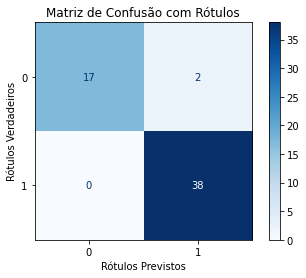

In [106]:
# Opcional: Plotar a matriz de confusão com rótulos
disp = ConfusionMatrixDisplay(confusion_matrix=matriz_con, display_labels=['0', '1'])
disp.plot(cmap='Blues')
disp.ax_.set_title('Matriz de Confusão com Rótulos')
disp.ax_.set_xlabel('Rótulos Previstos')
disp.ax_.set_ylabel('Rótulos Verdadeiros')

# Exercício

- Refaça os passos dos treinamentos do naive bayes anteriores, só que dessa vez não divida em conjunto de validação, por termos poucos dados. Muda a a proporção de treino e teste para 70% / 30% e reporte as métricas encontradas no conjunto de treino e de teste. 